<a href="https://colab.research.google.com/github/hawk20434/Software-tools-for-data-collection/blob/main/PW_03_Lygin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Выполнил: Лыгин М.В

Вариант - 8

Задание:

1. Файл CSV: данные о спортсменах (имя, вид спорта, результаты).
2. Файл Excel: данные о соревнованиях (соревнование, дата, призы).
3. Файл JSON: данные о тренерах (тренер, вид спорта, спортсмены).

**Задача: объединить данные и рассчитать, какие тренеры подготовили
больше всего победителей соревнований.**

In [16]:
import pandas as pd
import numpy as np
import json
from datetime import datetime, timedelta
import random
import matplotlib.pyplot as plt

In [2]:
# спортсмены
sports = ['Футбол', 'Баскетбол', 'Теннис', 'Легкая атлетика', 'Плавание']
results = ['Победа', 'Проигрыш']

athletes = []
for i in range(100):
    athlete = {
        'athlete_name': f'Спортсмен {i+1}',
        'sport': random.choice(sports),
        'result': random.choice(results)
    }
    athletes.append(athlete)

athletes_df = pd.DataFrame(athletes)
athletes_df.to_csv('athletes.csv', index=False)

In [3]:
# соревнования
competitions = []
start_date = datetime(2023, 1, 1)
end_date = datetime(2023, 12, 31)

for i in range(20):
    competition = {
        'competition_name': f'Соревнование {i+1}',
        'date': start_date + timedelta(days=random.randint(0, 365)),
        'prize': f'Приз {i+1}'
    }
    competitions.append(competition)

competitions_df = pd.DataFrame(competitions)
competitions_df.to_excel('competitions.xlsx', index=False)

In [4]:
# тренеры
coaches = []
for i in range(10):
    athletes_coached = random.sample([athlete['athlete_name'] for athlete in athletes], k=random.randint(5, 15))
    coach = {
        'coach': f'Тренер {i+1}',
        'sport': random.choice(sports),
        'athletes': athletes_coached
    }
    coaches.append(coach)

with open('coaches.json', 'w', encoding='utf-8') as f:
    json.dump(coaches, f, ensure_ascii=False, indent=4)

Обьединение данных

In [5]:
athletes_df = pd.read_csv('athletes.csv')
competitions_df = pd.read_excel('competitions.xlsx')
with open('coaches.json', 'r', encoding='utf-8') as f:
    coaches_data = json.load(f)

coaches_expanded = []
for coach in coaches_data:
    for athlete in coach['athletes']:
        coaches_expanded.append({'athlete_name': athlete, 'coach': coach['coach'], 'sport': coach['sport']})

coaches_df = pd.DataFrame(coaches_expanded)

In [6]:
athletes_df.head(3)

,athlete_name,sport,result
0,Спортсмен 1,Плавание,Проигрыш
1,Спортсмен 2,Плавание,Победа
2,Спортсмен 3,Легкая атлетика,Проигрыш


In [7]:
competitions_df.head(3)

,competition_name,date,prize
0,Соревнование 1,2023-10-05,Приз 1
1,Соревнование 2,2023-09-13,Приз 2
2,Соревнование 3,2023-10-20,Приз 3


In [8]:
coaches_df.head(3)

,athlete_name,coach,sport
0,Спортсмен 32,Тренер 1,Легкая атлетика
1,Спортсмен 20,Тренер 1,Легкая атлетика
2,Спортсмен 7,Тренер 1,Легкая атлетика


In [12]:
# объединение данных
merged_df = pd.merge(athletes_df, coaches_df, on=['athlete_name', 'sport'], how='left')
merged_df.head(3)

,athlete_name,sport,result,coach
0,Спортсмен 1,Плавание,Проигрыш,NaN
1,Спортсмен 2,Плавание,Победа,NaN
2,Спортсмен 3,Легкая атлетика,Проигрыш,NaN


In [13]:
# очистка данных
merged_df_clean = merged_df.dropna(subset=['coach'])

In [14]:
winners_df = merged_df[merged_df['result'] == 'Победа']
coach_winners_count = winners_df.groupby('coach')['athlete_name'].count().reset_index()
coach_winners_count.columns = ['coach', 'winners_count']

In [17]:
top_coaches = coach_winners_count.sort_values(by='winners_count', ascending=False)
top_coaches

,coach,winners_count
0,Тренер 1,3
4,Тренер 6,2
5,Тренер 9,2
1,Тренер 3,1
2,Тренер 4,1
3,Тренер 5,1


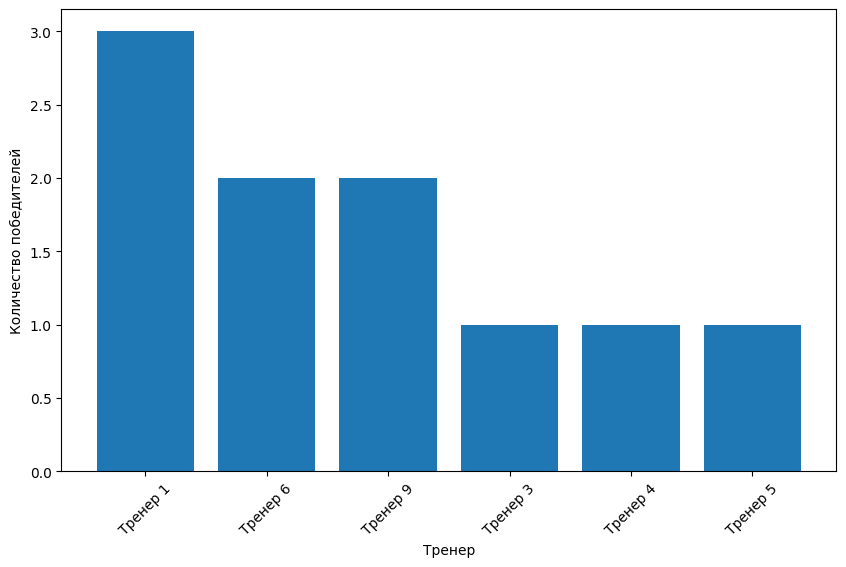

In [21]:
plt.figure(figsize=(10, 6))
plt.bar(top_coaches['coach'], top_coaches['winners_count'])
plt.xlabel('Тренер')
plt.ylabel('Количество победителей')
plt.xticks(rotation=45)
plt.show()

Итоги: тренер под номером 1 подготовил больше всего спортсменов с победами